In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd


In [3]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Age': [28, 34, 29, 32],
    'City': ['New York', 'Paris', 'Berlin', 'London']
}
data

{'Name': ['John', 'Anna', 'Peter', 'Linda'],
 'Age': [28, 34, 29, 32],
 'City': ['New York', 'Paris', 'Berlin', 'London']}

In [4]:
# convert dictionary to pandas DataFrame
df = pd.DataFrame(data)
df

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris
2,Peter,29,Berlin
3,Linda,32,London


## Filtering columns
```sql
Select Name from df
```

In [5]:
df['Name']

0     John
1     Anna
2    Peter
3    Linda
Name: Name, dtype: object

In [6]:
print(type(df))
type(df['Name'])

<class 'pandas.core.frame.DataFrame'>


pandas.core.series.Series

In [7]:
df.head(2) # Filtering rows

,Name,Age,City
0,John,28,New York
1,Anna,34,Paris


## Info

In [8]:
# returns 'object' when it does not know the data type (often mix of data type or string)
# reveals DataFrame structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    4 non-null      object
 1   Age     4 non-null      int64 
 2   City    4 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [9]:
print(df.shape) # (4 rows,3 columns)
df.dtypes # datatypes of columns

(4, 3)


Name    object
Age      int64
City    object
dtype: object

In [10]:
df.columns # ['Name', 'Age', 'City']

Index(['Name', 'Age', 'City'], dtype='object')

In [11]:
# count, mean, std, min, quartiles, max)
print(df.describe()) # only int and float columns stats (numeric) (no object columns)
# count, unique, top (most common value), freq (frequency of top) for object columns
df.describe(include = "all") # all columns stats (numeric + object columns)


             Age
count   4.000000
mean   30.750000
std     2.753785
min    28.000000
25%    28.750000
50%    30.500000
75%    32.500000
max    34.000000


,Name,Age,City
count,4,4.000000,4
unique,4,NaN,4
top,John,NaN,New York
freq,1,NaN,1
mean,NaN,30.750000,NaN
std,NaN,2.753785,NaN
min,NaN,28.000000,NaN
25%,NaN,28.750000,NaN
50%,NaN,30.500000,NaN
75%,NaN,32.500000,NaN


In [12]:
# load csv into dataframe (local or URL)
tips_df = pd.read_csv('./tips.csv')
print(tips_df)
tips_df.head(5)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
# all descriptive data for the columns
tips_df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## Try to Select day, time, tip
```sql
Select day, time, tip from tips_df
```

In [14]:
print(tips_df[['day', 'time', 'tip']]) # multiple columns
tips_df[['day', 'time', 'tip']].head()

      day    time   tip
0     Sun  Dinner  1.01
1     Sun  Dinner  1.66
2     Sun  Dinner  3.50
3     Sun  Dinner  3.31
4     Sun  Dinner  3.61
..    ...     ...   ...
239   Sat  Dinner  5.92
240   Sat  Dinner  2.00
241   Sat  Dinner  2.00
242   Sat  Dinner  1.75
243  Thur  Dinner  3.00

[244 rows x 3 columns]


,day,time,tip
0,Sun,Dinner,1.01
1,Sun,Dinner,1.66
2,Sun,Dinner,3.50
3,Sun,Dinner,3.31
4,Sun,Dinner,3.61


In [15]:
print(tips_df[['tip', 'size']].head(5))
# add new column (average tip per person)
tips_df['tips_per_person'] = tips_df['tip'] / tips_df['size']
# last 10 values
tips_df.tail(10)

    tip  size
0  1.01     2
1  1.66     3
2  3.50     3
3  3.31     2
4  3.61     4


,total_bill,tip,sex,smoker,day,time,size,tips_per_person
234,15.53,3.00,Male,Yes,Sat,Dinner,2,1.500000
235,10.07,1.25,Male,No,Sat,Dinner,2,0.625000
236,12.60,1.00,Male,Yes,Sat,Dinner,2,0.500000
237,32.83,1.17,Male,Yes,Sat,Dinner,2,0.585000
238,35.83,4.67,Female,No,Sat,Dinner,3,1.556667
239,29.03,5.92,Male,No,Sat,Dinner,3,1.973333
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.000000
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1.000000
242,17.82,1.75,Male,No,Sat,Dinner,2,0.875000
243,18.78,3.00,Female,No,Thur,Dinner,2,1.500000


# Find the percentage of tips 
- Percentage
- Add it as another column

In [16]:
# add tip percentage as a new column
tips_df['tip_percent'] = round(tips_df['tip'] / tips_df['total_bill'] * 100, 2)
# tips_df['tip_percent'] 
# how to delete a column (forever using 'inplace=True')
# tips_df.drop(columns='tips_percentage', inplace=True)
tips_df
# Sort in Dataframe by total bill, tip and finally tip_percent (highest to lowest/descending)
tips_df.sort_values(by="total_bill")
tips_df.sort_values(by="tip", ascending=False)
tips_df.sort_values(by="tip_percent", ascending=False).head(5)


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
172,7.25,5.15,Male,Yes,Sun,Dinner,2,2.575,71.03
178,9.60,4.00,Female,Yes,Sun,Dinner,2,2.000,41.67
67,3.07,1.00,Female,Yes,Sat,Dinner,1,1.000,32.57
232,11.61,3.39,Male,No,Sat,Dinner,2,1.695,29.20
183,23.17,6.50,Male,Yes,Sun,Dinner,4,1.625,28.05


## Task 1
Filter the rows where people dined on a Sunday

In [17]:
# add all true and false to find out amount of sundays
print((tips_df['day']=='Sun').sum())
# Boolean Matrix (filter original matrix with)
print(tips_df[tips_df['day'] == 'Sun'].shape[0]) # number of rows reveals number of sundays
tips_df[tips_df['day'] == 'Sun']


76
76


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,0.553333,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,1.166667,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,1.655000,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.902500,14.68
...,...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,1.166667,16.75
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.57
188,18.15,3.50,Female,Yes,Sun,Dinner,3,1.166667,19.28
189,23.10,4.00,Male,Yes,Sun,Dinner,3,1.333333,17.32


In [18]:
tips_df
# orders in descending order by default (number of items for each unique value)
print(tips_df['day'].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


## Task 2
Get the rows where people have tipped more than $3 on a Friday

```sql
Select * from tips_df 
where day = "Fri" and tip > 3
```

In [19]:
friday_tips = tips_df[tips_df['day'] == 'Fri']
friday_tips
friday_tips[friday_tips['tip'] > 3]
# or
# & -> and || | -> or
# Binary operation
tips_df[(tips_df['day'] == 'Fri') & (tips_df['tip'] > 3)]



,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
94,22.75,3.25,Female,No,Fri,Dinner,2,1.6250,14.29
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


## Task 3
Extended Task 2, give the top 5 tips on that Friday

In [20]:
# friday_tips[friday_tips['tip'] > 3].sort_values(by='tip', ascending=False).head(5)
# or
tips_df[(tips_df['day'] == 'Fri') & (tips_df['tip'] > 3)].sort_values(by="tip", ascending=False).head(5)

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.1825,11.77
93,16.32,4.30,Female,Yes,Fri,Dinner,2,2.1500,26.35
96,27.28,4.00,Male,Yes,Fri,Dinner,2,2.0000,14.66
91,22.49,3.50,Male,No,Fri,Dinner,2,1.7500,15.56
221,13.42,3.48,Female,Yes,Fri,Lunch,2,1.7400,25.93


In [21]:
(tips_df['tip'] > 3).value_counts() # counts the amount of similar items(for each unique value) and sorts in descending by default
# counts how many are true and false as a boolean matrix is returned

tip
False    146
True      98
Name: count, dtype: int64

# Task 4
Rows where - Large parties : people are 5 or more or they spend $35 or more 

In [22]:
tips_df[(tips_df['size'] >= 5) | (tips_df['total_bill'] >= 35)]
# .shape[0] = no. of rows
# .shape[1] = no. of columns

# Accessing values in df:
    # Dot syntax or Box syntax
    # have to use this syntax if there is a space value in the column name or if the column name is a keyword like "size"
    # tips_df['tip'] 
    # tips_df.tip


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
11,35.26,5.00,Female,No,Sun,Dinner,4,1.250000,14.18
23,39.42,7.58,Male,No,Sat,Dinner,4,1.895000,19.23
56,38.01,3.00,Male,Yes,Sat,Dinner,4,0.750000,7.89
59,48.27,6.73,Male,No,Sat,Dinner,4,1.682500,13.94
95,40.17,4.73,Male,Yes,Fri,Dinner,4,1.182500,11.77
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64
112,38.07,4.00,Male,No,Sun,Dinner,3,1.333333,10.51
125,29.80,4.20,Female,No,Thur,Lunch,6,0.700000,14.09
141,34.30,6.70,Male,No,Thur,Lunch,6,1.116667,19.53
142,41.19,5.00,Male,No,Thur,Lunch,5,1.000000,12.14


## Data Exploration

## Summarization
- Filter rows, columns
- head, tail - limit
- sort_values
- Conditionals with operators

## Slicing
- loc
-iloc - index

In [23]:
# print first 6 rows
print(tips_df.head(6))
print("Using ilocs")
# one row/series using "iloc" (gets index - "i")
print(tips_df.iloc[3] )
# slicing to get multiple rows using "iloc" (last value is not included as that index is not located)
tips_df.iloc[3:5] 

   total_bill   tip     sex smoker  day    time  size  tips_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2         0.505000   
1       10.34  1.66    Male     No  Sun  Dinner     3         0.553333   
2       21.01  3.50    Male     No  Sun  Dinner     3         1.166667   
3       23.68  3.31    Male     No  Sun  Dinner     2         1.655000   
4       24.59  3.61  Female     No  Sun  Dinner     4         0.902500   
5       25.29  4.71    Male     No  Sun  Dinner     4         1.177500   

   tip_percent  
0         5.94  
1        16.05  
2        16.66  
3        13.98  
4        14.68  
5        18.62  
Using ilocs
total_bill          23.68
tip                  3.31
sex                  Male
smoker                 No
day                   Sun
time               Dinner
size                    2
tips_per_person     1.655
tip_percent         13.98
Name: 3, dtype: object


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.68


In [24]:
tips_df.loc[3] 
# slicing to get multiple rows with "loc" (last value is included)
tips_df.loc[3:5] 

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
3,23.68,3.31,Male,No,Sun,Dinner,2,1.6550,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,0.9025,14.68
5,25.29,4.71,Male,No,Sun,Dinner,4,1.1775,18.62


In [25]:
# tips_df.tail(6).loc[1] # error as row index of "1" is not there in last 6 values of DataFrame
print(tips_df.tail(6).loc[239]) # match the value/name and not the rows position
print("Last 6 values")
print(tips_df.tail(6))
# finds index of row position (second row in dataframe)
print("Second row in DataFrame")
print(tips_df.tail(6).iloc[1])
# find row 2 and 3 in it (excludes last one)
tips_df.tail(6).iloc[2:4]

total_bill            29.03
tip                    5.92
sex                    Male
smoker                   No
day                     Sat
time                 Dinner
size                      3
tips_per_person    1.973333
tip_percent           20.39
Name: 239, dtype: object
Last 6 values
     total_bill   tip     sex smoker   day    time  size  tips_per_person  \
238       35.83  4.67  Female     No   Sat  Dinner     3         1.556667   
239       29.03  5.92    Male     No   Sat  Dinner     3         1.973333   
240       27.18  2.00  Female    Yes   Sat  Dinner     2         1.000000   
241       22.67  2.00    Male    Yes   Sat  Dinner     2         1.000000   
242       17.82  1.75    Male     No   Sat  Dinner     2         0.875000   
243       18.78  3.00  Female     No  Thur  Dinner     2         1.500000   

     tip_percent  
238        13.03  
239        20.39  
240         7.36  
241         8.82  
242         9.82  
243        15.97  
Second row in DataFrame
total_bill  

,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
240,27.18,2.0,Female,Yes,Sat,Dinner,2,1.0,7.36
241,22.67,2.0,Male,Yes,Sat,Dinner,2,1.0,8.82


In [26]:
# does not work with iloc 
# gets values that are either for specific or a range of columns
# .loc[row_slicing, column_slicing]
print("First 6")
print(tips_df.head(6))
print('*****')
# get for rows 239 to 241 and column "tip" 
print(tips_df.tail(6).loc[239:241, 'tip'])
print('*****')
# get for rows 239 to 241 and columns "tip" and "size"
print(tips_df.tail(6).loc[239:241, ['tip', 'size']])
print('*****')
# get for rows 239 to 241 and columns "tip" (including) until "size" (excluding size) (all columns between those 2 columns)
tips_df.tail(6).loc[239:241, 'tip': 'day']

First 6
   total_bill   tip     sex smoker  day    time  size  tips_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2         0.505000   
1       10.34  1.66    Male     No  Sun  Dinner     3         0.553333   
2       21.01  3.50    Male     No  Sun  Dinner     3         1.166667   
3       23.68  3.31    Male     No  Sun  Dinner     2         1.655000   
4       24.59  3.61  Female     No  Sun  Dinner     4         0.902500   
5       25.29  4.71    Male     No  Sun  Dinner     4         1.177500   

   tip_percent  
0         5.94  
1        16.05  
2        16.66  
3        13.98  
4        14.68  
5        18.62  
*****
239    5.92
240    2.00
241    2.00
Name: tip, dtype: float64
*****
      tip  size
239  5.92     3
240  2.00     2
241  2.00     2
*****


,tip,sex,smoker,day
239,5.92,Male,No,Sat
240,2.00,Female,Yes,Sat
241,2.00,Male,Yes,Sat


In [27]:
# have to specify indexes of row values you want and then indexes of column values you want
tips_df.tail(6).iloc[2:4, 1:5]

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


In [28]:
# using "loc" and "iloc" together
tips_df.tail(6).iloc[2:4].loc[:, 'tip': 'day']

,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


# Task 1
Display the rows ordered by high to low by tip_percent only for the Weekend (Sat & Sun) & skip the first 5 results 

Retrieve and list the entries, sorting them from highest to lowest by 'tip_percent', excluding the first five results, specifically for weekends (Saturday and Sunday).

In [29]:
or_by_tip_perc = tips_df.sort_values(by="tip_percent", ascending=False)
# or_by_tip_perc.head(6)
# Use iloc to use indexes [5:] = skip first 5 rows so it's excluded
or_by_tip_perc.iloc[5:][(tips_df['day'] == 'Sat') | (tips_df['day'] == 'Sun')]
# or
final = tips_df[tips_df['day'].isin(['Sat', 'Sun'])].sort_values(by="tip_percent", ascending=False).iloc[5:]
final

C:\Users\E1005288\AppData\Local\Temp\ipykernel_7656\1419902315.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  or_by_tip_perc.iloc[5:][(tips_df['day'] == 'Sat') | (tips_df['day'] == 'Sun')]


,total_bill,tip,sex,smoker,day,time,size,tips_per_person,tip_percent
109,14.31,4.00,Female,Yes,Sat,Dinner,2,2.000000,27.95
51,10.29,2.60,Female,No,Sun,Dinner,2,1.300000,25.27
181,23.33,5.65,Male,Yes,Sun,Dinner,2,2.825000,24.22
185,20.69,5.00,Male,No,Sun,Dinner,5,1.000000,24.17
174,16.82,4.00,Male,Yes,Sun,Dinner,2,2.000000,23.78
...,...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.400000,6.57
0,16.99,1.01,Female,No,Sun,Dinner,2,0.505000,5.94
57,26.41,1.50,Female,No,Sat,Dinner,2,0.750000,5.68
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.833333,5.64


# Task 2
Final result should include only tip_percent, day, tip, total_bill

In [30]:
# get for rows 239 to 241 and columns "tip" and "size"
print(final.loc[:, ['tip_percent', 'day', 'tip', 'total_bill']])
# or
print(final[['tip_percent', 'day', 'tip', 'total_bill']])

     tip_percent  day   tip  total_bill
109        27.95  Sat  4.00       14.31
51         25.27  Sun  2.60       10.29
181        24.22  Sun  5.65       23.33
185        24.17  Sun  5.00       20.69
174        23.78  Sun  4.00       16.82
..           ...  ...   ...         ...
187         6.57  Sun  2.00       30.46
0           5.94  Sun  1.01       16.99
57          5.68  Sat  1.50       26.41
102         5.64  Sat  2.50       44.30
237         3.56  Sat  1.17       32.83

[158 rows x 4 columns]
     tip_percent  day   tip  total_bill
109        27.95  Sat  4.00       14.31
51         25.27  Sun  2.60       10.29
181        24.22  Sun  5.65       23.33
185        24.17  Sun  5.00       20.69
174        23.78  Sun  4.00       16.82
..           ...  ...   ...         ...
187         6.57  Sun  2.00       30.46
0           5.94  Sun  1.01       16.99
57          5.68  Sat  1.50       26.41
102         5.64  Sat  2.50       44.30
237         3.56  Sat  1.17       32.83

[158 rows x 4 c

#  Task 3
Filter `tips_df.tail(6)` rows on 2:4 index 'tip' : 'day'

In [31]:
print(tips_df.tail(6).iloc[2:4].loc[:, 'tip' : 'day'])
# or
tips_df.tail(6).iloc[2:4][['tip', 'sex', 'smoker', 'day']]

     tip     sex smoker  day
240  2.0  Female    Yes  Sat
241  2.0    Male    Yes  Sat


,tip,sex,smoker,day
240,2.0,Female,Yes,Sat
241,2.0,Male,Yes,Sat


# Statistics
- mean
- median
- sum

In [32]:
print("mean for tip")
print(tips_df['tip'].mean())
print("median for tip")
print(tips_df['tip'].median())
print("sum for tip")
print(tips_df['tip'].sum())
print("mode for tip")
print(tips_df['tip'].mode())

# multiple columns
print("mean for total bill and tip")
print(tips_df[['total_bill', 'tip']].mean())
print("median for total bill and tip")
print(tips_df[['total_bill', 'tip']].median())
print("sum for total bill and tip")
print(tips_df[['total_bill', 'tip']].sum())
print("mode for toal bill and tip")
print(tips_df[['total_bill', 'tip']].mode())
print("max for toal bill and tip")
print(tips_df[['total_bill', 'tip']].max())
print("min for total bill and tip")
print(tips_df[['total_bill', 'tip']].min())


mean for tip
2.99827868852459
median for tip
2.9
sum for tip
731.5799999999999
mode for tip
0    2.0
Name: tip, dtype: float64
mean for total bill and tip
total_bill    19.785943
tip            2.998279
dtype: float64
median for total bill and tip
total_bill    17.795
tip            2.900
dtype: float64
sum for total bill and tip
total_bill    4827.77
tip            731.58
dtype: float64
mode for toal bill and tip
   total_bill  tip
0       13.42  2.0
max for toal bill and tip
total_bill    50.81
tip           10.00
dtype: float64
min for total bill and tip
total_bill    3.07
tip           1.00
dtype: float64


# Summarizing

- Bread and butter

# Task 1
Average total_bill on each day
```sql
SELECT day, AVG(total_bill) FROM tips_df GROUP BY day
```

In [33]:
# what column are we grouping by, what column are we grouping it by and what aggregate function are we using on it
tips_df.groupby('day')['total_bill'].mean() 

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

# Task 2.1
Who leaves more total tip Smoker vs Non-Smoker by Total

In [34]:
tips_df.groupby('smoker')['tip'].sum()

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

# Task 2.2
Who leaves more total tip Smoker vs Non-Smoker by average

In [35]:
tips_df.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [36]:
# In one go you can visualize mueiplt summariries
tips_df.groupby('smoker').aggregate({'tip': ['sum', 'mean'], 'total_bill' : 'mean'}) 

tip           total_bill
           sum      mean       mean
smoker                             
No      451.77  2.991854  19.188278
Yes     279.81  3.008710  20.756344

# Task 3
Based on the day return the total of total_bill and the average tip_percent

In [37]:
tips_df.groupby('day').aggregate({'total_bill': 'sum', 'tip_percent': 'mean'})

,total_bill,tip_percent
day,,
Fri,325.88,16.991579
Sat,1778.40,15.314598
Sun,1627.16,16.689605
Thur,1096.33,16.126452


In [38]:
# group by two things
print(tips_df.groupby(['smoker', 'day'])['tip'].mean())
# order matters (for visualising)
tips_df.groupby(['day', 'smoker'])['tip'].mean()

smoker  day 
No      Fri     2.812500
        Sat     3.102889
        Sun     3.167895
        Thur    2.673778
Yes     Fri     2.714000
        Sat     2.875476
        Sun     3.516842
        Thur    3.030000
Name: tip, dtype: float64


day   smoker
Fri   No        2.812500
      Yes       2.714000
Sat   No        3.102889
      Yes       2.875476
Sun   No        3.167895
      Yes       3.516842
Thur  No        2.673778
      Yes       3.030000
Name: tip, dtype: float64

In [54]:
tips_df.groupby(['day', 'sex']).aggregate({'tip': ['min', 'mean', 'max']})

tip                 
              min      mean    max
day  sex                          
Fri  Female  1.00  2.781111   4.30
     Male    1.50  2.693000   4.73
Sat  Female  1.00  2.801786   6.50
     Male    1.00  3.083898  10.00
Sun  Female  1.01  3.367222   5.20
     Male    1.32  3.220345   6.50
Thur Female  1.25  2.575625   5.17
     Male    1.44  2.980333   6.70

In [55]:
# pivot table for smoker tip contributions
# group by day and smoker and give the total tips by each smoker on each day (pivot table gives nice visualisation that is easy to see and understand with columns)
pd.pivot_table(tips_df, index="day", columns="smoker", values="tip", aggfunc="sum")

smoker,No,Yes
day,,
Fri,11.25,40.71
Sat,139.63,120.77
Sun,180.57,66.82
Thur,120.32,51.51


## Task 1
On average, which sex gives more money from tips on each day

In [57]:
tips_df.groupby(['day', 'sex'])['tip'].mean()

day   sex   
Fri   Female    2.781111
      Male      2.693000
Sat   Female    2.801786
      Male      3.083898
Sun   Female    3.367222
      Male      3.220345
Thur  Female    2.575625
      Male      2.980333
Name: tip, dtype: float64

## Unstack
Transform the result more eaier to analyze (It pulls out the aggregate columns into separate columns instead of rows (like pivot table))

In [39]:
tips_df.groupby(['day', 'sex'])['tip'].mean().unstack()

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


## Task 2
On average, max, and min which sex earns more money from tips on each day

In [58]:
tips_df.groupby(['day', 'sex']).aggregate({'tip': ['mean', 'max', 'min']})

tip             
                 mean    max   min
day  sex                          
Fri  Female  2.781111   4.30  1.00
     Male    2.693000   4.73  1.50
Sat  Female  2.801786   6.50  1.00
     Male    3.083898  10.00  1.00
Sun  Female  3.367222   5.20  1.01
     Male    3.220345   6.50  1.32
Thur Female  2.575625   5.17  1.25
     Male    2.980333   6.70  1.44

In [40]:
tips_df.groupby(['day', 'sex']).aggregate({'tip': ['mean', 'max', 'min']}).unstack()

tip                                     
          mean              max           min      
sex     Female      Male Female   Male Female  Male
day                                                
Fri   2.781111  2.693000   4.30   4.73   1.00  1.50
Sat   2.801786  3.083898   6.50  10.00   1.00  1.00
Sun   3.367222  3.220345   5.20   6.50   1.01  1.32
Thur  2.575625  2.980333   5.17   6.70   1.25  1.44

In [41]:
# pivot tables: can have multiple columns and values
pd.pivot_table(tips_df, index='day', columns= 'smoker', values='tip', aggfunc='sum')

smoker,No,Yes
day,,
Fri,11.25,40.71
Sat,139.63,120.77
Sun,180.57,66.82
Thur,120.32,51.51


## Visualize

- Matplot
    - Pioneer
    - Beginner-friendly
- Seaborn 
    - Uses matplot internally 
    - Complex visulalisation easily

In [42]:
%pip install matplotlib

In [43]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar graph
Average total_bill by each day

['Sun' 'Sat' 'Thur' 'Fri']


<BarContainer object of 4 artists>

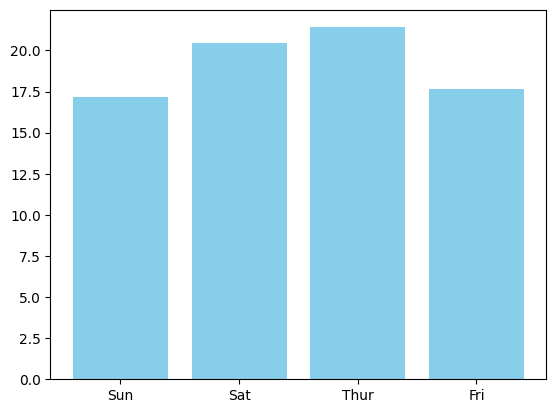

In [45]:
# x-axis = days (unique); y-axis = average total_bill per day
# duplicate items if you do not use ".unique()"
x_days = tips_df['day'].unique()
print(x_days)
y_avg_total_bill = tips_df.groupby('day')['total_bill'].mean()
y_avg_total_bill
# use matplotlib to make bar graph
plt.bar(x_days, y_avg_total_bill, color="skyblue") 


Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object', name='day')


Text(0.5, 1.0, 'Average sales in the week')

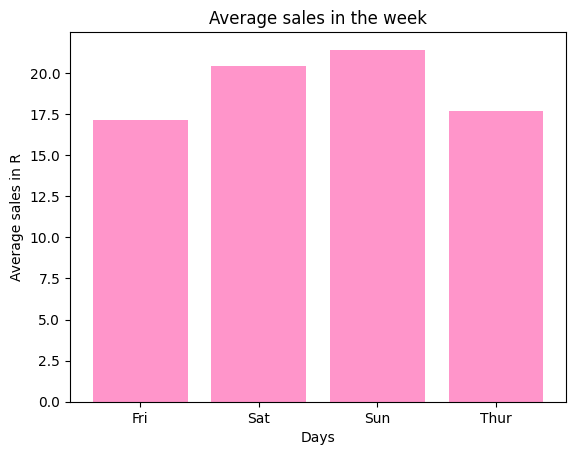

In [59]:
# to order the days properly
x_days = y_avg_total_bill.index
print(x_days)
plt.bar(x_days, y_avg_total_bill, color="hotpink", alpha=0.7)
plt.xlabel("Days")
plt.ylabel("Average sales in R")
plt.title("Average sales in the week")

<Axes: title={'center': 'Average sales in the week'}, xlabel='Days', ylabel='Average sales in R'>

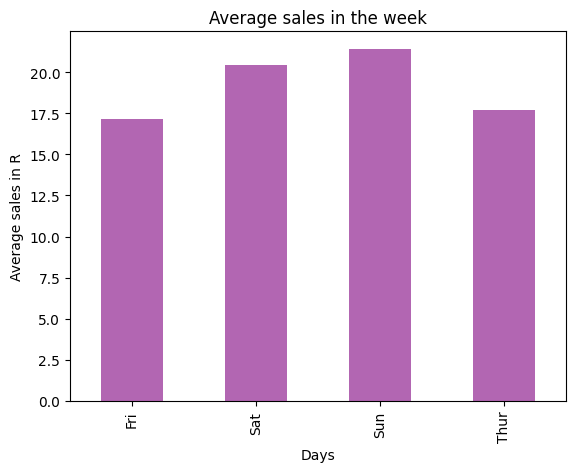

In [47]:
y_avg_total_bill = tips_df.groupby('day')['total_bill'].mean()
# to order the days properly
x_days = y_avg_total_bill.index

# plt.bar(x_days, y_avg_total_bill, color="hotpink", alpha=0.7)
# plt.xlabel("Days")
# plt.ylabel("Average sales in R")
# plt.title("Average sales in the week")

# can use this approach due to it being a series (if dataframe you have to use the other approach)
y_avg_total_bill.plot(kind="bar", xlabel="Days", ylabel="Average sales in R", title="Average sales in the week", color="purple", alpha=0.6)

## Pie chart

<Axes: title={'center': 'Average sales in the week'}, ylabel='total_bill'>

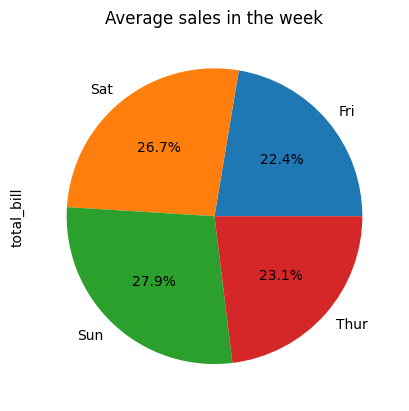

In [48]:
# how many decimal points and have to end with a percentage
y_avg_total_bill.plot(kind="pie", autopct="%1.1f%%", title="Average sales in the week")

## Task
Create a pie chart comparing how many times people have visited on what time of the day


time
Dinner    176
Lunch      68
Name: count, dtype: int64


<Axes: title={'center': 'Proportion of meals'}, ylabel='count'>

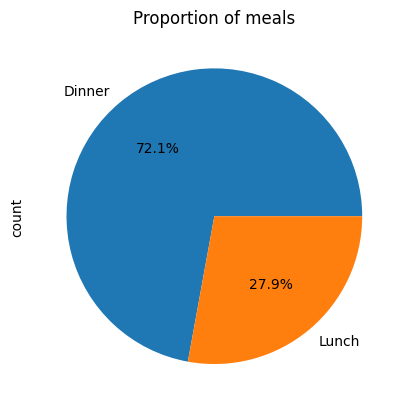

In [63]:
# y_avg_time_of_day = tips_df.groupby('time')['time'].count()
# or
# get amount of people per time of day (lunch vs dinner)
y_avg_time_of_day = tips_df['time'].value_counts()
print(y_avg_time_of_day)
y_avg_time_of_day.plot(kind="pie", autopct="%1.1f%%", title="Proportion of meals")


## Scatter plot

Text(0.5, 1.0, 'Tip Percent vs Total Bill')

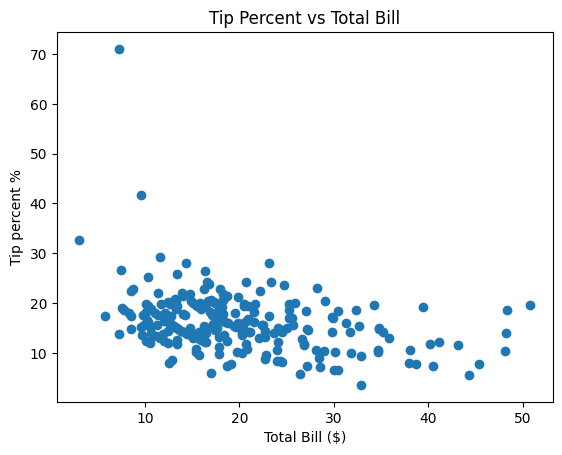

In [50]:
# x-axis = total_bill vs y-axis = tip_percent
plt.scatter(tips_df['total_bill'], tips_df['tip_percent'])
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip percent %')
# y-axis vs x-axis title format
plt.title('Tip Percent vs Total Bill')

# HISTOGRAMS

### Ticket size
- Big or Small order size

Ticket size - Total_Bill -> x-axis vs Frequency -> y-axis

Text(0, 0.5, 'Frequency')

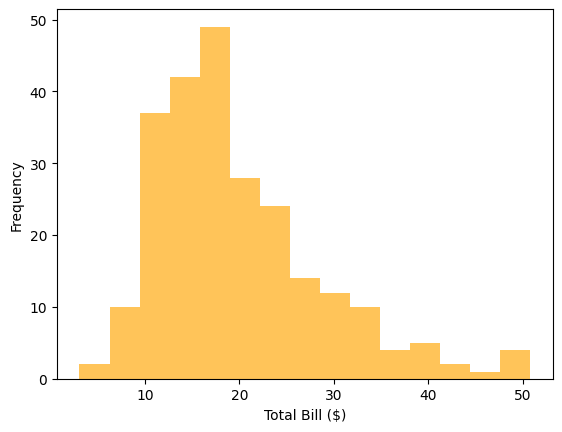

In [51]:
plt.hist(tips_df['total_bill'], color='orange', alpha=0.65, bins=15)
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')

C:\Users\E1005288\AppData\Local\Temp\ipykernel_7656\588282538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='total_bill', data=tips_df, palette='pastel')


Text(0.5, 1.0, 'Average sales in the week')

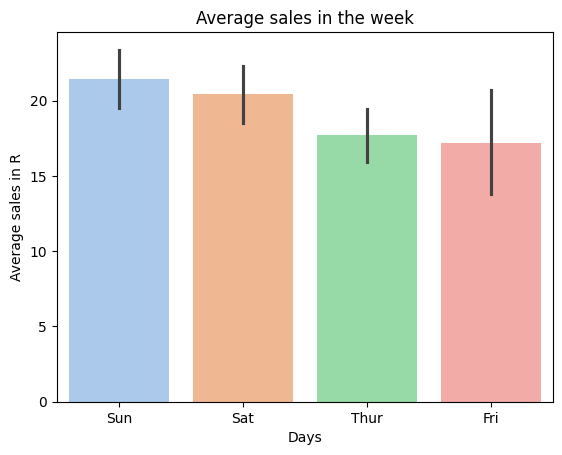

In [64]:
# x -> day vs y -> total_bill
# gets mean for 'total_bill' (y-axis) by default
sns.barplot(x='day', y='total_bill', data=tips_df, palette='pastel')
# tips_df.groupby('day')['total_bill'].mean()
plt.xlabel("Days")
plt.ylabel("Average sales in R")
plt.title("Average sales in the week")

Text(0, 0.5, 'Tip amount (R)')

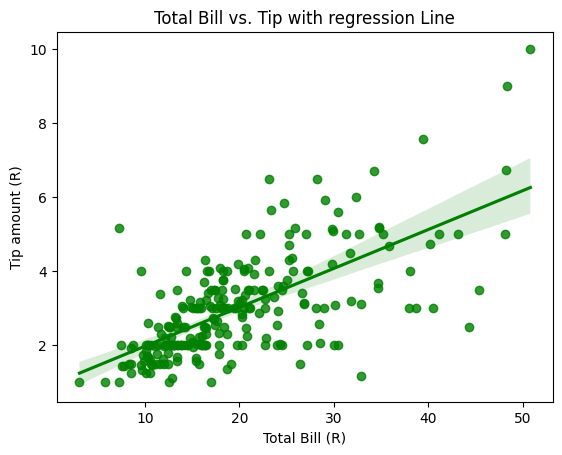

In [53]:
# Visualise relationship between the variables
sns.regplot(x='total_bill', y='tip', data=tips_df, color='green')
plt.title('Total Bill vs. Tip with regression Line')
plt.xlabel('Total Bill (R)')
plt.ylabel('Tip amount (R)')